# Titanic dataset analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Clean Dataset
### import data & remove useless columns

In [2]:
data = pd.read_csv("data/train.csv").drop("Name", axis=1).drop("Ticket", axis=1).drop("Cabin", axis=1)

In [3]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [4]:
data = pd.get_dummies(data)
# to prevent the dummy variables trap
data.drop(['Sex_female', 'Embarked_C'], axis=1, inplace=True)

In [5]:
data["family_size"] = data["SibSp"] + data["Parch"]
data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

### Separate features and targets

In [6]:
X = data[:].drop('Survived', axis=1)
y = data['Survived']

In [7]:
print(X.head())

   PassengerId  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S  \
0            1       3  22.0   7.2500         1           0           1   
1            2       1  38.0  71.2833         0           0           0   
2            3       3  26.0   7.9250         0           0           1   
3            4       1  35.0  53.1000         0           0           1   
4            5       3  35.0   8.0500         1           0           1   

   family_size  
0            1  
1            1  
2            0  
3            1  
4            0  


### Histogram of age for died & survived people

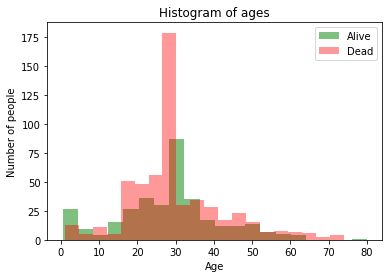

In [20]:
plt.hist(data.loc[y == 1, "Age"], color="green", label="Alive", alpha=0.5, bins=20)
plt.hist(data.loc[y == 0, "Age"], color="red", label="Dead", alpha=0.4, bins=20)

plt.title('Histogram of ages')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend(loc='upper right')

plt.show()


*Conclusion of the histogram => * We should consider "Age" feature in our model